In [3]:
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np

def es(T):
    return 611.21*np.exp(17.67*(T-273.15)/(T-29.65))

def Fd(T,P):
    Rv=461.5
    P0=101325
    T0=273.15
    row_l=997
    D=2.11*1e-5*((T/T0)**1.94)*(P0/P)
    return row_l*Rv*T/(D*es(T))

def Fk(T,P):
    Lv0=2.5*1000000
    T0=273.15
    Rv=461.5
    Lv=Lv0+(-2317)*(T-273.15)
    K=4.1868*1e-3*(5.69+0.017*(T-T0))
    row_l=997
    return (Lv/(Rv*T)-1)*(row_l*Lv/(K*T))

def epsilon(fd,fk):
    return 1/(fd+fk)*1e12

def surfacetension(T):
    return((-1.55*1/10000*T)+0.118)

def A(T):
    sigma=surfacetension(T)
    Rv=461.5
    row_l=999.85
    j=(2*sigma)/(row_l*Rv*T)
    return j

def s_exp(r,T):
    return np.exp(A(T)/(r*1e-6))

def aw(r,rd,k):
    nominator= (r**3)-(rd**3)
    denominator=(r**3)-(rd**3*(1-k))
    return (nominator/denominator)

def kohlercurve(r,rd,k,T):
    s=aw(r,rd,k)*s_exp(r,T)
    return s

def drdt1(r,s,T,P,rd):
    a=(1/r)*(s-kohlercurve(r,rd,k,T))/(Fd(T,P)+Fk(T,P))
    print(1/(Fd(T,P)+Fk(T,P)))
    return a

def drdt2(r,s,T,P):
    a=(1/r)*(s-1)/(Fd(T,P)+Fk(T,P))
    print(1/(Fd(T,P)+Fk(T,P)))
    return a


5.941345439865857e-11
5.941345439865857e-11
5.941345439865857e-11
5.941345439865857e-11
5.941345439865857e-11
5.941345439865857e-11


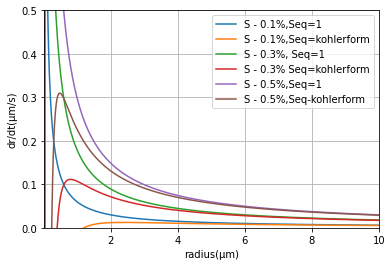

In [9]:
rd=0.01
r=np.linspace(rd,10,1000)
T=273.15
P=100000
plt.grid()
s=1.001
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="S - 0.1%,Seq=1")
drdt_r1=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r1,label="S - 0.1%,Seq=kohlerform")

s=1.003
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="S - 0.3%, Seq=1")
drdt_r2=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r2,label="S - 0.3% Seq=kohlerform")

s=1.005
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="S - 0.5%,Seq=1")
drdt_r3=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r3,label="S - 0.5%,Seq-kohlerform")


plt.ylabel("dr/dt(\u03BCm/s)")
plt.xlabel("radius(\u03BCm)")
plt.xlim(0.01,10)
plt.ylim(0.0,0.5)
plt.legend()
plt.show()

5.941345439865857e-11
5.941345439865857e-11
6.301428214650646e-11
6.301428214650646e-11
6.707973452314282e-11
6.707973452314282e-11


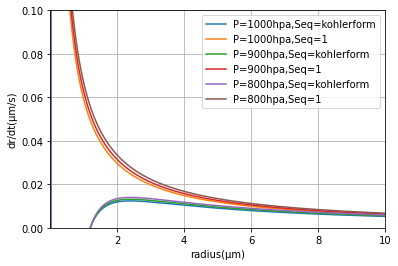

In [20]:
#Dependence on Pressure
rd=0.01
r=np.linspace(rd,10,1000)
T=273.15
P=100000
plt.grid()
s=1.001 #keep changing S for values 0.1,0.3,0.5
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="P=1000hpa,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="P=1000hpa,Seq=1")

P=90000
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="P=900hpa,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="P=900hpa,Seq=1")

P=80000
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="P=800hpa,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="P=800hpa,Seq=1")

plt.ylabel("dr/dt(\u03BCm/s)")
plt.xlabel("radius(\u03BCm)")
plt.xlim(0.01,10)
plt.ylim(0.0,0.1)
plt.legend()
plt.show()

5.941345439865857e-11
5.941345439865857e-11
9.080059341851178e-11
9.080059341851178e-11
1.2471911982947705e-10
1.2471911982947705e-10


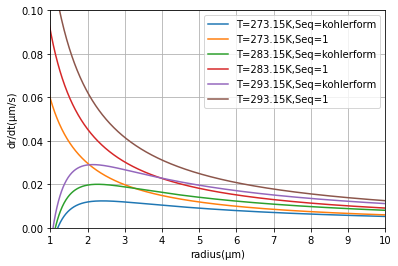

In [22]:
#Dependence on Temperature
rd=0.01
r=np.linspace(rd,10,1000)
T=273.15
P=100000
plt.grid()
s=1.001 #keep changing S for values 0.1,0.3,0.5
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=1")
T=283.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=1")
T=293.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=1")

plt.ylabel("dr/dt(\u03BCm/s)")
plt.xlabel("radius(\u03BCm)")
plt.xlim(1,10)
plt.ylim(0.0,0.1)
plt.legend()
plt.show()

5.941345439865857e-11
5.941345439865857e-11
9.080059341851178e-11
9.080059341851178e-11
1.2471911982947705e-10
1.2471911982947705e-10


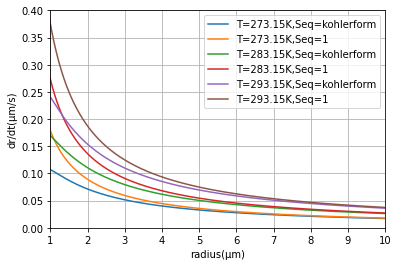

In [27]:
#Dependence on Temperature
rd=0.01
r=np.linspace(rd,10,1000)
T=273.15
P=100000
plt.grid()
s=1.003 #keep changing S for values 0.1,0.3,0.5
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=1")
T=283.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=1")
T=293.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=1")

plt.ylabel("dr/dt(\u03BCm/s)")
plt.xlabel("radius(\u03BCm)")
plt.xlim(1,10)
plt.ylim(0.0,0.4)
plt.legend()
plt.show()

5.941345439865857e-11
5.941345439865857e-11
9.080059341851178e-11
9.080059341851178e-11
1.2471911982947705e-10
1.2471911982947705e-10


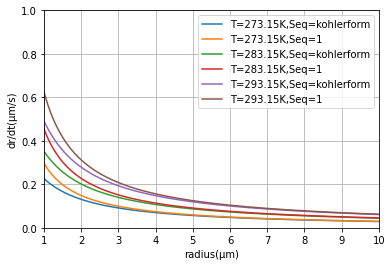

In [32]:
#Dependence on Temperature
rd=0.01
r=np.linspace(rd,10,1000)
T=273.15
P=100000
plt.grid()
s=1.005 #keep changing S for values 0.1,0.3,0.5
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=273.15K,Seq=1")
T=283.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=283.15K,Seq=1")
T=293.15
drdt_r=drdt1(r,s,T,P,rd)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=kohlerform")
drdt_r=drdt2(r,s,T,P)*1e12
plt.plot(r,drdt_r,label="T=293.15K,Seq=1")

plt.ylabel("dr/dt(\u03BCm/s)")
plt.xlabel("radius(\u03BCm)")
plt.xlim(1,10)
plt.ylim(0.0,1)
plt.legend()
plt.show()

In [70]:
def cal_r(T,P,rd,t,to,s):
    epsi=epsilon(Fd(T,P),Fk(T,P))
    a=np.sqrt(rd*rd+2*epsi*(s-1.000855)*(t-to))
    return a

def cal_r1(T,P,rd,t,to,s):
    epsi=epsilon(Fd(T,P),Fk(T,P))
    a=np.sqrt(rd*rd+2*epsi*(s-1)*(t-to))
    return a

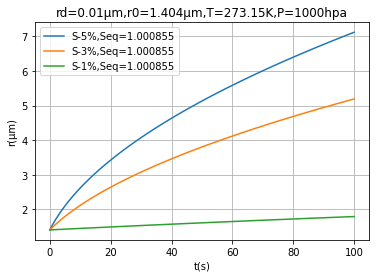

In [77]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="S-5%,Seq=1.000855")
radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="S-3%,Seq=1.000855")
radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="S-1%,Seq=1.000855")

plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,T=273.15K,P=1000hpa")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

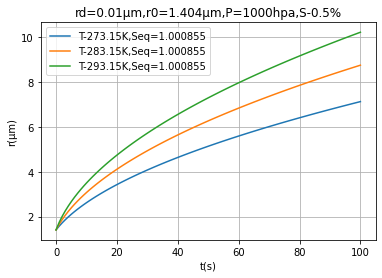

In [79]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="T-273.15K,Seq=1.000855")
radius_t=cal_r(283.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="T-283.15K,Seq=1.000855")
radius_t=cal_r(293.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="T-293.15K,Seq=1.000855")

plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,P=1000hpa,S-0.5%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

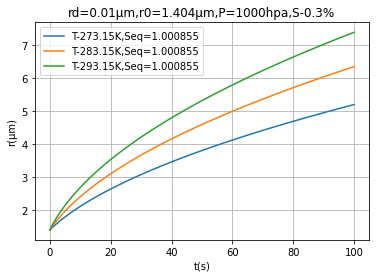

In [80]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="T-273.15K,Seq=1.000855")
radius_t=cal_r(283.15,100000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="T-283.15K,Seq=1.000855")
radius_t=cal_r(293.15,100000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="T-293.15K,Seq=1.000855")

plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,P=1000hpa,S-0.3%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

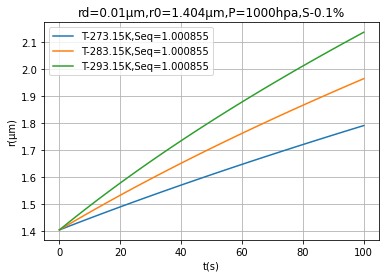

In [81]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="T-273.15K,Seq=1.000855")
radius_t=cal_r(283.15,100000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="T-283.15K,Seq=1.000855")
radius_t=cal_r(293.15,100000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="T-293.15K,Seq=1.000855")

plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,P=1000hpa,S-0.1%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

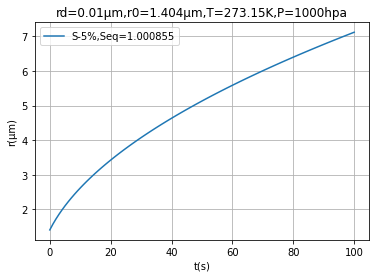

In [83]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="S-5%,Seq=1.000855")

plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,T=273.15K,P=1000hpa")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

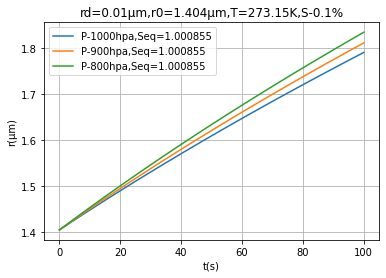

In [85]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="P-1000hpa,Seq=1.000855")
radius_t=cal_r(273.15,90000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="P-900hpa,Seq=1.000855")
radius_t=cal_r(273.15,80000.0,1.404,t,t0,1.001)
plt.plot(t,radius_t,label="P-800hpa,Seq=1.000855")
plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,T=273.15K,S-0.1%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

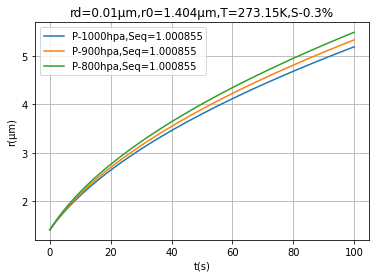

In [86]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="P-1000hpa,Seq=1.000855")
radius_t=cal_r(273.15,90000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="P-900hpa,Seq=1.000855")
radius_t=cal_r(273.15,80000.0,1.404,t,t0,1.003)
plt.plot(t,radius_t,label="P-800hpa,Seq=1.000855")
plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,T=273.15K,S-0.3%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()

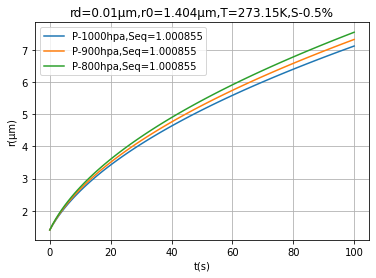

In [87]:
tf=100.0
t0=0.0
t=np.linspace(t0,tf,100)

radius_t=cal_r(273.15,100000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="P-1000hpa,Seq=1.000855")
radius_t=cal_r(273.15,90000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="P-900hpa,Seq=1.000855")
radius_t=cal_r(273.15,80000.0,1.404,t,t0,1.005)
plt.plot(t,radius_t,label="P-800hpa,Seq=1.000855")
plt.grid()
plt.title("rd=0.01\u03BCm,r0=1.404\u03BCm,T=273.15K,S-0.5%")
plt.xlabel("t(s)")
plt.ylabel("r(\u03BCm)")
plt.legend()
plt.show()